In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pingouin as pg

In [2]:
df=pd.read_csv("prl.csv")

In [3]:
df=df.drop("PC_PRD",1)

In [4]:
df

,DATE,CCN ($cm^{-3}$),PM$_{2.5}$ ($\mu$ g m$^{-3}$),SS (%),Precipitation (mm day$^{-1}$),Height (Re14-cb) (m)
0,2013/6/26,1043.916667,14.877976,0.134444,29.083333,2530.100000
1,2013/7/2,1065.000000,12.708333,0.120000,31.750000,2937.500000
2,2013/7/7,1210.466667,14.820000,0.200333,106.100000,2957.700000
3,2013/7/18,1260.500000,19.250000,0.203333,45.500000,3282.500000
4,2013/7/23,1105.750000,31.000000,0.202500,23.750000,6972.000000
5,2013/8/3,685.500000,12.966667,0.190000,357.500000,2192.750000
6,2013/8/19,660.250000,20.150000,0.197500,27.750000,1576.750000
7,2014/6/13,790.000000,64.000000,0.260000,0.000000,2281.500000
8,2014/7/7,951.875000,38.333333,0.151250,23.666667,2287.375000
9,2014/7/10,1103.520833,23.930556,0.173958,93.125000,3019.133333


In [5]:
df=df[df["Precipitation (mm day$^{-1}$)"]>0]

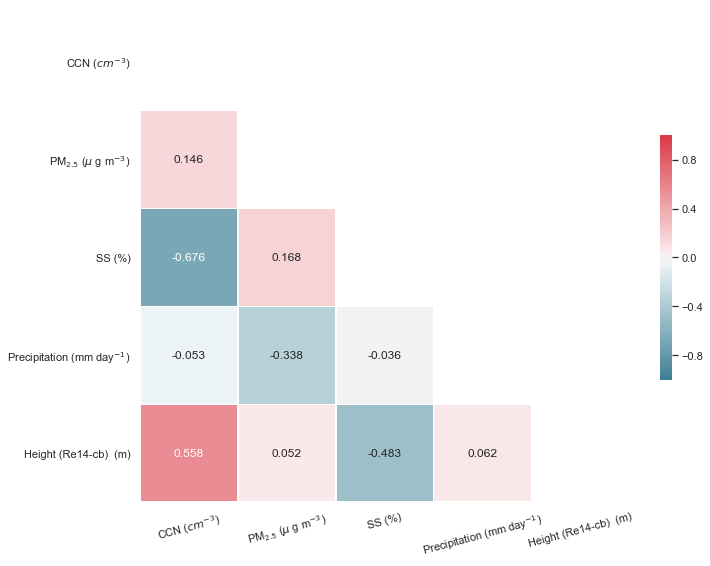

In [6]:
sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, clim=(-1, 1),vmax=1.0, vmin=-1.0,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True, fmt="0.3f")
plt.xticks(rotation=15)
plt.savefig("PRD_corr_num1-allrain.png",dpi=600)

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
df.set_index('DATE', inplace=True)

In [9]:
profile=pandas_profiling.ProfileReport(df)
profile.to_file(outputfile = "prd_profilerain.html")

In [10]:
pg.ttest(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,14.277,78,two-sided,1.842202e-23,"[711.31, 941.83]",3.192,1.315e+20,1.0


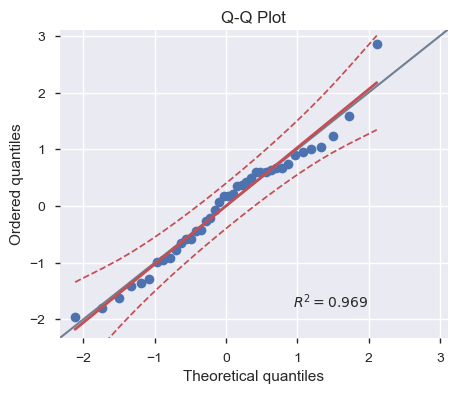

In [11]:
pg.qqplot(df["CCN ($cm^{-3}$)"], dist='norm')

In [12]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,40,-0.053,"[-0.36, 0.26]",0.003,-0.051,0.746024,0.207,0.062


In [13]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["PM$_{2.5}$ ($\mu$ g m$^{-3}$)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,40,0.146,"[-0.17, 0.44]",0.021,-0.031,0.367266,0.292,0.148


In [14]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["SS (%)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,40,-0.676,"[-0.82, -0.46]",0.457,0.427,0.000002,1.221e+04,0.999


In [15]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Height (Re14-cb)  (m)"].values)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,40,0.558,"[0.3, 0.74]",0.312,0.274,0.000182,169.137,0.972


In [16]:
pg.corr(df["CCN ($cm^{-3}$)"].values,df["Precipitation (mm day$^{-1}$)"].values, method="spearman")

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,40,0.031,"[-0.28, 0.34]",0.001,-0.053,0.848702,0.054
